In [1]:
import pandas as pd
import seaborn as sns

In [3]:
#Score dos texto dos tweets
#contains the textual sentiment classification of the 1,179,957 selected tweets of the T4SA dataset.
#C:/Users/bhla/Residencia/Sidi/Analise de Sentimento\Datasets/b-t4sa_imgs/b-t4sa_all.txt', 'r'
tweet_sent = "D:/SiDi/Project/Modulo II/dataset/t4sa_text_sentiment.tsv"
df_tweet_sent = pd.read_csv(tweet_sent, sep='\t')



In [4]:
df_tweet_sent.head()

,TWID,NEG,NEU,POS
0,768096868504969216,0.049398,0.861395,0.089207
1,768097237620490241,0.028733,0.929554,0.041713
2,768097619281227776,0.006598,0.046810,0.946591
3,768097619285536768,0.032333,0.850945,0.116722
4,768097627686604801,0.008090,0.042331,0.949579


In [5]:
df_tweet_sent["TWID"] = df_tweet_sent["TWID"].astype(str)
# Setting TWID as index
df_tweet_sent = df_tweet_sent.set_index("TWID")
df_tweet_sent.head()

,NEG,NEU,POS
TWID,,,
768096868504969216,0.049398,0.861395,0.089207
768097237620490241,0.028733,0.929554,0.041713
768097619281227776,0.006598,0.046810,0.946591
768097619285536768,0.032333,0.850945,0.116722
768097627686604801,0.008090,0.042331,0.949579


In [6]:
#verify if index is duplicated
any(df_tweet_sent.index.duplicated())

False

In [7]:
#Texto dos tweets
#contains id and text of all the collected ~3.4 M tweets.
tweet_text = "D:/SiDi/Project/Modulo II/dataset/raw_tweets_text.csv"
df_tweet_text = pd.read_csv(tweet_text,sep=",", encoding='utf-8')
df_tweet_text.head()

,id,text
0,758014713804587008,RT @polarcomic: And surprise! the #RegularShow...
1,758014717990428672,RT @SweetBabyBellB: My unproblematic fav who k...
2,758014646716665857,RT @WhyLarryIsReal: I mean we know harry isn't...
3,758014655071526912,"RT @Eastbay: She's ready, resilient, and on ou..."
4,758014642526429184,RT @SheeeRatchet: find someone who loves you a...


In [8]:
#set id as index
df_tweet_text["id"] = df_tweet_text["id"].astype(str)
df_tweet_text = df_tweet_text.set_index("id")
df_tweet_text.head()

,text
id,
758014713804587008,RT @polarcomic: And surprise! the #RegularShow...
758014717990428672,RT @SweetBabyBellB: My unproblematic fav who k...
758014646716665857,RT @WhyLarryIsReal: I mean we know harry isn't...
758014655071526912,"RT @Eastbay: She's ready, resilient, and on ou..."
758014642526429184,RT @SheeeRatchet: find someone who loves you a...


In [9]:
#find text tweet by id
df_tweet_text.loc["758014713804587008"]

text    RT @polarcomic: And surprise! the #RegularShow...
Name: 758014713804587008, dtype: object

In [10]:
#check if id index contains duplicated id
any(df_tweet_text.index.duplicated())

False

In [13]:
# reading image data from disk dictory
import sys,os
list_image_id = []
list_image_quant =[]
list_image_name =[]
root = "D:/SiDi/Project/Modulo II/dataset/b-t4sa_imgs/data/"
for path, subdirs, files in os.walk(root):
    for name in files:
        list_image_id.append(str(os.path.splitext(name)[0]).split("-")[0])
        list_image_quant.append(str(os.path.splitext(name)[0]).split("-")[1])
        list_image_name.append(str(os.path.splitext(name)[0]))

In [14]:
df =pd.DataFrame()

In [15]:
# creating new dataframe from split of file name
df["id"] = list_image_id
df["image_quant"] =  list_image_quant
df["image_name"] = list_image_name
#df = df.drop_duplicates(subset='id', keep="last")
df = df.set_index("id")
df.head()


,image_quant,image_name
id,,
768097808037605376,1,768097808037605376-1
768097833215938560,1,768097833215938560-1
768097929659817984,1,768097929659817984-1
768097929659817984,2,768097929659817984-2
768097929659817984,3,768097929659817984-3


In [16]:
# verify if is id feature is duplicated

any(df.index.duplicated())

True

In [17]:
#join image df (image_quant, image_name,) and polarity tweet df (NEG,NEU, POS) by id
df_final = df.join(df_tweet_sent, how='inner')
df_final

,image_quant,image_name,NEG,NEU,POS
768097808037605376,1,768097808037605376-1,0.919993,0.055681,0.024326
768097833215938560,1,768097833215938560-1,0.864726,0.058440,0.076834
768097929659817984,1,768097929659817984-1,0.907574,0.061396,0.031029
768097929659817984,2,768097929659817984-2,0.907574,0.061396,0.031029
768097929659817984,3,768097929659817984-3,0.907574,0.061396,0.031029
...,...,...,...,...,...
804618699315539969,1,804618699315539969-1,0.453963,0.387611,0.158427
804618854466981888,1,804618854466981888-1,0.651498,0.208690,0.139812
804619265546387457,1,804619265546387457-1,0.473848,0.382078,0.144074
804619315861393408,1,804619315861393408-1,0.402850,0.337901,0.259249


In [18]:
#join image df (image_quant, image_name, NEG,NEU, POS) and text tweet df  by id
df_final = df_final.join(df_tweet_text, how='inner')
df_final


,image_quant,image_name,NEG,NEU,POS,text
768097808037605376,1,768097808037605376-1,0.919993,0.055681,0.024326,"RT @hoseokahhh: ""who is this song forwhat do i..."
768097833215938560,1,768097833215938560-1,0.864726,0.058440,0.076834,RT @ARapperSaid_: “I ain’t come over here for ...
768097929659817984,1,768097929659817984-1,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...
768097929659817984,2,768097929659817984-2,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...
768097929659817984,3,768097929659817984-3,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...
...,...,...,...,...,...,...
804618699315539969,1,804618699315539969-1,0.453963,0.387611,0.158427,Chances not to loose&gt;&gt;&gt;https://t.co/j...
804618854466981888,1,804618854466981888-1,0.651498,0.208690,0.139812,Don't hear this much RT @phillynewsnow: Lyft ...
804619265546387457,1,804619265546387457-1,0.473848,0.382078,0.144074,Security agencies threaten to assassinate me –...
804619315861393408,1,804619315861393408-1,0.402850,0.337901,0.259249,"Kill my trusted old assistant? Why, no. I'm go..."


In [19]:
#classify instances final df by polarity max between ( NEG,NEU, POS) and creatin new feautre(sent_text?) 
df_final["sent_text"] = df_final[['NEG','NEU','POS']].idxmax(axis=1)
df_final.head()

,image_quant,image_name,NEG,NEU,POS,text,sent_text
768097808037605376,1,768097808037605376-1,0.919993,0.055681,0.024326,"RT @hoseokahhh: ""who is this song forwhat do i...",NEG
768097833215938560,1,768097833215938560-1,0.864726,0.058440,0.076834,RT @ARapperSaid_: “I ain’t come over here for ...,NEG
768097929659817984,1,768097929659817984-1,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG
768097929659817984,2,768097929659817984-2,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG
768097929659817984,3,768097929659817984-3,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG


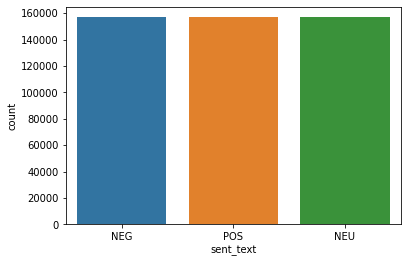

In [20]:
sns.countplot(x = df_final['sent_text']);

In [21]:
# Using readline()
file1 = open('D:/SiDi/Project/Modulo II/dataset/b-t4sa_all.txt', 'r')
count = 0
 
image_sent = []
image_name = []
path_image = []
while True:
    count += 1
 
    # Get next line from file
    line = file1.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
        
    path_image.append(line.split()[0])
    
    image_sent.append(line.split()[1])
    image_name.append(line.split()[0].split("/")[2].split(".")[0])
    

file1.close()

In [32]:
# creating dataframe from image classification output in file by authors 
df_image_info =pd.DataFrame()
df_image_info["sent_image"] = image_sent
df_image_info["image_name"] = image_name
df_image_info["image_path"] = path_image
df_image_info.head()

,sent_image,image_name,image_path
0,0,784760943188189184-1,data/78476/784760943188189184-1.jpg
1,2,782267072923525120-1,data/78226/782267072923525120-1.jpg
2,0,801804526848278529-1,data/80180/801804526848278529-1.jpg
3,2,769271101667016704-3,data/76927/769271101667016704-3.jpg
4,0,796181957453512704-1,data/79618/796181957453512704-1.jpg


In [33]:
# set image_name as index from image df
df_image_info = df_image_info.set_index("image_name")
# set image_name as index from final df
df_final = df_final.set_index("image_name")


In [34]:
df_image_info.head()

,sent_image,image_path
image_name,,
784760943188189184-1,0,data/78476/784760943188189184-1.jpg
782267072923525120-1,2,data/78226/782267072923525120-1.jpg
801804526848278529-1,0,data/80180/801804526848278529-1.jpg
769271101667016704-3,2,data/76927/769271101667016704-3.jpg
796181957453512704-1,0,data/79618/796181957453512704-1.jpg


In [36]:
df_final.head()

,image_quant,NEG,NEU,POS,text,sent_text
image_name,,,,,,
768097808037605376-1,1,0.919993,0.055681,0.024326,"RT @hoseokahhh: ""who is this song forwhat do i...",NEG
768097833215938560-1,1,0.864726,0.058440,0.076834,RT @ARapperSaid_: “I ain’t come over here for ...,NEG
768097929659817984-1,1,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG
768097929659817984-2,2,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG
768097929659817984-3,3,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG


In [37]:
# join final df and image df by image_name index
df_final = df_final.join(df_image_info, how='inner')
del df_final["image_quant"]
df_final.head()

,NEG,NEU,POS,text,sent_text,sent_image,image_path
image_name,,,,,,,
768097808037605376-1,0.919993,0.055681,0.024326,"RT @hoseokahhh: ""who is this song forwhat do i...",NEG,0,data/76809/768097808037605376-1.jpg
768097833215938560-1,0.864726,0.058440,0.076834,RT @ARapperSaid_: “I ain’t come over here for ...,NEG,0,data/76809/768097833215938560-1.jpg
768097929659817984-1,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG,0,data/76809/768097929659817984-1.jpg
768097929659817984-2,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG,0,data/76809/768097929659817984-2.jpg
768097929659817984-3,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG,0,data/76809/768097929659817984-3.jpg


In [38]:
#export final df 
df_final.to_csv("D:/SiDi/Project/Modulo II/dataset/output/dataset_sidi.csv", sep='\t', encoding='utf-8')


In [39]:
pd.read_csv("D:/SiDi/Project/Modulo II/dataset/output/dataset_sidi.csv", sep='\t').head()

,image_name,NEG,NEU,POS,text,sent_text,sent_image,image_path
0,768097808037605376-1,0.919993,0.055681,0.024326,"RT @hoseokahhh: ""who is this song forwhat do i...",NEG,0,data/76809/768097808037605376-1.jpg
1,768097833215938560-1,0.864726,0.058440,0.076834,RT @ARapperSaid_: “I ain’t come over here for ...,NEG,0,data/76809/768097833215938560-1.jpg
2,768097929659817984-1,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG,0,data/76809/768097929659817984-1.jpg
3,768097929659817984-2,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG,0,data/76809/768097929659817984-2.jpg
4,768097929659817984-3,0.907574,0.061396,0.031029,RT @blackedfriction: i hate telling people i l...,NEG,0,data/76809/768097929659817984-3.jpg
